In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
nt_list = ["A", "T", "C", "G"]

In [3]:
# convert one-hot arrays to sequences
def convert_to_seq(seq_raw):
    seq_vec = np.array(seq_raw.split(","), dtype=int).reshape([1000,4])
    seq = ""
    for nt_arr in seq_vec:
        pos = np.where(nt_arr == 1)[0]
        if pos.shape[0] != 1:
            raise ValueError
        else:
            seq += nt_list[pos[0]]
    return seq

In [4]:
def find_kmer(TF_name, kmer):
    f_samples = "/storage/pandaman/project/AgentBind-GM12878-analysis/tmp/"\
                    + "%s+GM12878/seqs_one_hot_c/vis-samples/data.txt" %(TF_name)
    pos_stat = {}
    for line in open(f_samples):
        seq_raw, label, info = line.split(";")
        seq = convert_to_seq(seq_raw)
        elems = info.strip().split(",")
        chromID, seq_start, seq_end, strand = elems[3], int(elems[6]), int(elems[7]) , elems[8]
        seq_start, seq_end = seq_start+1, seq_end+1 #0-based to 1-based
        
        # identify matched kmers
        matches = [m.start() for m in re.finditer('(?=%s)' %(kmer), seq)]
        
        # record the relative positions
        for m in matches:
            if m not in pos_stat:
                pos_stat[m] = 0
            pos_stat[m] += 1

        if strand == "-":
            matches = [1000-m-len(kmer) for m in matches]
            matches = matches[::-1]
        
        if len(matches) != 0:
            print_msg = "Sequence: %s:%d-%d %s\t" %(chromID, seq_start, seq_end, strand) +\
                  "Matched kmers start at: %s: " %(chromID) +\
                  (", ".join(["%d(%d)" %(m+seq_start, m) for m in matches]))
            
            # uncomment the following line to see all the positions of matches
            # print (print_msg)
        
    return pos_stat

In [5]:
pos_stat = find_kmer("NFYB", "TGTGG")

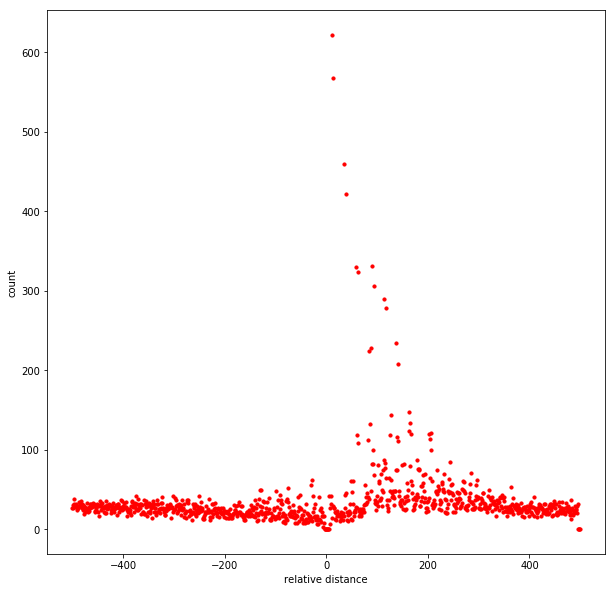

In [7]:
# plot the kmer distribution
for pos in range(1000):
    if pos not in pos_stat:
        pos_stat[pos] = 0

fig = plt.figure()
fig.set_size_inches((10, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("relative distance")
ax.set_ylabel("count")
ax.scatter([pos-500 for pos in range(1000)], [pos_stat[pos] for pos in range(1000)], c="r", s=10)

In [8]:
sum([v for v in pos_stat.values()])

34360

In [9]:
pos_stat

{0: 26,
 1: 30,
 2: 27,
 3: 32,
 4: 38,
 5: 30,
 6: 28,
 7: 31,
 8: 24,
 9: 29,
 10: 27,
 11: 26,
 12: 29,
 13: 34,
 14: 29,
 15: 32,
 16: 32,
 17: 35,
 18: 32,
 19: 26,
 20: 24,
 21: 30,
 22: 19,
 23: 29,
 24: 26,
 25: 22,
 26: 26,
 27: 26,
 28: 24,
 29: 33,
 30: 22,
 31: 24,
 32: 23,
 33: 28,
 34: 31,
 35: 27,
 36: 32,
 37: 28,
 38: 28,
 39: 30,
 40: 32,
 41: 33,
 42: 29,
 43: 32,
 44: 21,
 45: 23,
 46: 26,
 47: 24,
 48: 30,
 49: 31,
 50: 21,
 51: 29,
 52: 30,
 53: 16,
 54: 35,
 55: 29,
 56: 24,
 57: 32,
 58: 28,
 59: 33,
 60: 28,
 61: 26,
 62: 26,
 63: 22,
 64: 20,
 65: 29,
 66: 20,
 67: 35,
 68: 25,
 69: 30,
 70: 28,
 71: 27,
 72: 31,
 73: 30,
 74: 29,
 75: 20,
 76: 24,
 77: 28,
 78: 29,
 79: 28,
 80: 33,
 81: 22,
 82: 25,
 83: 27,
 84: 28,
 85: 30,
 86: 26,
 87: 30,
 88: 18,
 89: 31,
 90: 31,
 91: 26,
 92: 22,
 93: 28,
 94: 25,
 95: 36,
 96: 25,
 97: 35,
 98: 24,
 99: 25,
 100: 29,
 101: 33,
 102: 26,
 103: 28,
 104: 28,
 105: 34,
 106: 28,
 107: 24,
 108: 16,
 109: 25,
 110: 21,
